In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [37]:
data = pd.read_csv("C:/Users/omond/Downloads/insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.shape

(1338, 7)

In [8]:
# percentage of missing values in each column
round(100*(data.isnull().sum()/len(data)),2).sort_values(ascending = False)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [9]:
# percentage of missing values in each row
round(100*(data.isnull().sum(axis=1)/len(data)),2).sort_values(ascending = False)[:5]

0      0.0
898    0.0
896    0.0
895    0.0
894    0.0
dtype: float64

In [10]:
data_dub=data.copy()
# Checking for duplicates and dropping the entire duplicate row if any
data_dub.drop_duplicates(subset=None, inplace=True)

In [11]:
data_dub.shape

(1337, 7)

In [12]:
data.shape

(1338, 7)

In [14]:
for col in data:
    print(data[col].value_counts(ascending=False), '\n\n\n')

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64 



male      676
female    662
Name: sex, dtype: int64 



32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64 



0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64 



no     1064
yes     274
Name: smoker, dtype: int64 



southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64 



1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1


In [15]:
# Check the datatypes before convertion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
# Convert to 'category' data type

data['sex']=data['sex'].astype('category')
data['smoker']=data['smoker'].astype('category')
data['children']=data['children'].astype('category')
data['region']=data['region'].astype('category')

In [17]:
 
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

data_new = pd.get_dummies(data, drop_first=True)
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   charges           1338 non-null   float64
 3   sex_male          1338 non-null   uint8  
 4   children_1        1338 non-null   uint8  
 5   children_2        1338 non-null   uint8  
 6   children_3        1338 non-null   uint8  
 7   children_4        1338 non-null   uint8  
 8   children_5        1338 non-null   uint8  
 9   smoker_yes        1338 non-null   uint8  
 10  region_northwest  1338 non-null   uint8  
 11  region_southeast  1338 non-null   uint8  
 12  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(1), uint8(10)
memory usage: 44.6 KB


In [18]:
data_new.shape

(1338, 13)

In [19]:
# Check the shape before spliting

data_new.shape

(1338, 13)

In [20]:
# Check the info before spliting

data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   charges           1338 non-null   float64
 3   sex_male          1338 non-null   uint8  
 4   children_1        1338 non-null   uint8  
 5   children_2        1338 non-null   uint8  
 6   children_3        1338 non-null   uint8  
 7   children_4        1338 non-null   uint8  
 8   children_5        1338 non-null   uint8  
 9   smoker_yes        1338 non-null   uint8  
 10  region_northwest  1338 non-null   uint8  
 11  region_southeast  1338 non-null   uint8  
 12  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(1), uint8(10)
memory usage: 44.6 KB


In [21]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(data_new, train_size = 0.70, test_size = 0.30, random_state = 100)

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 966 to 792
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               936 non-null    int64  
 1   bmi               936 non-null    float64
 2   charges           936 non-null    float64
 3   sex_male          936 non-null    uint8  
 4   children_1        936 non-null    uint8  
 5   children_2        936 non-null    uint8  
 6   children_3        936 non-null    uint8  
 7   children_4        936 non-null    uint8  
 8   children_5        936 non-null    uint8  
 9   smoker_yes        936 non-null    uint8  
 10  region_northwest  936 non-null    uint8  
 11  region_southeast  936 non-null    uint8  
 12  region_southwest  936 non-null    uint8  
dtypes: float64(2), int64(1), uint8(10)
memory usage: 38.4 KB


In [23]:
df_train.shape

(936, 13)

In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 12 to 1164
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               402 non-null    int64  
 1   bmi               402 non-null    float64
 2   charges           402 non-null    float64
 3   sex_male          402 non-null    uint8  
 4   children_1        402 non-null    uint8  
 5   children_2        402 non-null    uint8  
 6   children_3        402 non-null    uint8  
 7   children_4        402 non-null    uint8  
 8   children_5        402 non-null    uint8  
 9   smoker_yes        402 non-null    uint8  
 10  region_northwest  402 non-null    uint8  
 11  region_southeast  402 non-null    uint8  
 12  region_southwest  402 non-null    uint8  
dtypes: float64(2), int64(1), uint8(10)
memory usage: 16.5 KB


In [25]:
df_test.shape

(402, 13)

In [26]:
df_test.shape

(402, 13)

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 966 to 792
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               936 non-null    int64  
 1   bmi               936 non-null    float64
 2   charges           936 non-null    float64
 3   sex_male          936 non-null    uint8  
 4   children_1        936 non-null    uint8  
 5   children_2        936 non-null    uint8  
 6   children_3        936 non-null    uint8  
 7   children_4        936 non-null    uint8  
 8   children_5        936 non-null    uint8  
 9   smoker_yes        936 non-null    uint8  
 10  region_northwest  936 non-null    uint8  
 11  region_southeast  936 non-null    uint8  
 12  region_southwest  936 non-null    uint8  
dtypes: float64(2), int64(1), uint8(10)
memory usage: 38.4 KB


In [28]:
df_train.columns

Index(['age', 'bmi', 'charges', 'sex_male', 'children_1', 'children_2',
       'children_3', 'children_4', 'children_5', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

NameError: name 'plt' is not defined

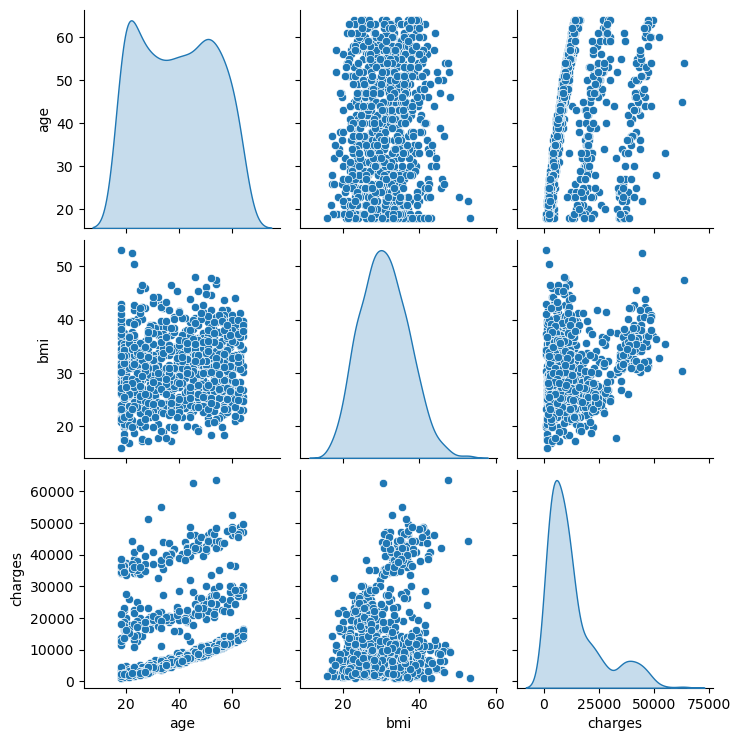

In [30]:
# Create a new dataframe of only numeric variables:

data_num=df_train[[ 'age', 'bmi', 'charges']]

sns.pairplot(data_num, diag_kind='kde')
plt.show()

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 966 to 792
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               936 non-null    int64  
 1   bmi               936 non-null    float64
 2   charges           936 non-null    float64
 3   sex_male          936 non-null    uint8  
 4   children_1        936 non-null    uint8  
 5   children_2        936 non-null    uint8  
 6   children_3        936 non-null    uint8  
 7   children_4        936 non-null    uint8  
 8   children_5        936 non-null    uint8  
 9   smoker_yes        936 non-null    uint8  
 10  region_northwest  936 non-null    uint8  
 11  region_southeast  936 non-null    uint8  
 12  region_southwest  936 non-null    uint8  
dtypes: float64(2), int64(1), uint8(10)
memory usage: 70.7 KB


In [34]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plot.figure(figsize=(25, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'sex', y = 'charges', data = data)
plt.subplot(2,2,2)
sns.boxplot(x = 'children', y = 'charges', data = data)
plt.subplot(2,2,3)
sns.boxplot(x = 'smoker', y = 'charges', data = data)
plt.subplot(2,2,4)
sns.boxplot(x = 'region', y = 'charges', data = data)
plt.show()

NameError: name 'plot' is not defined

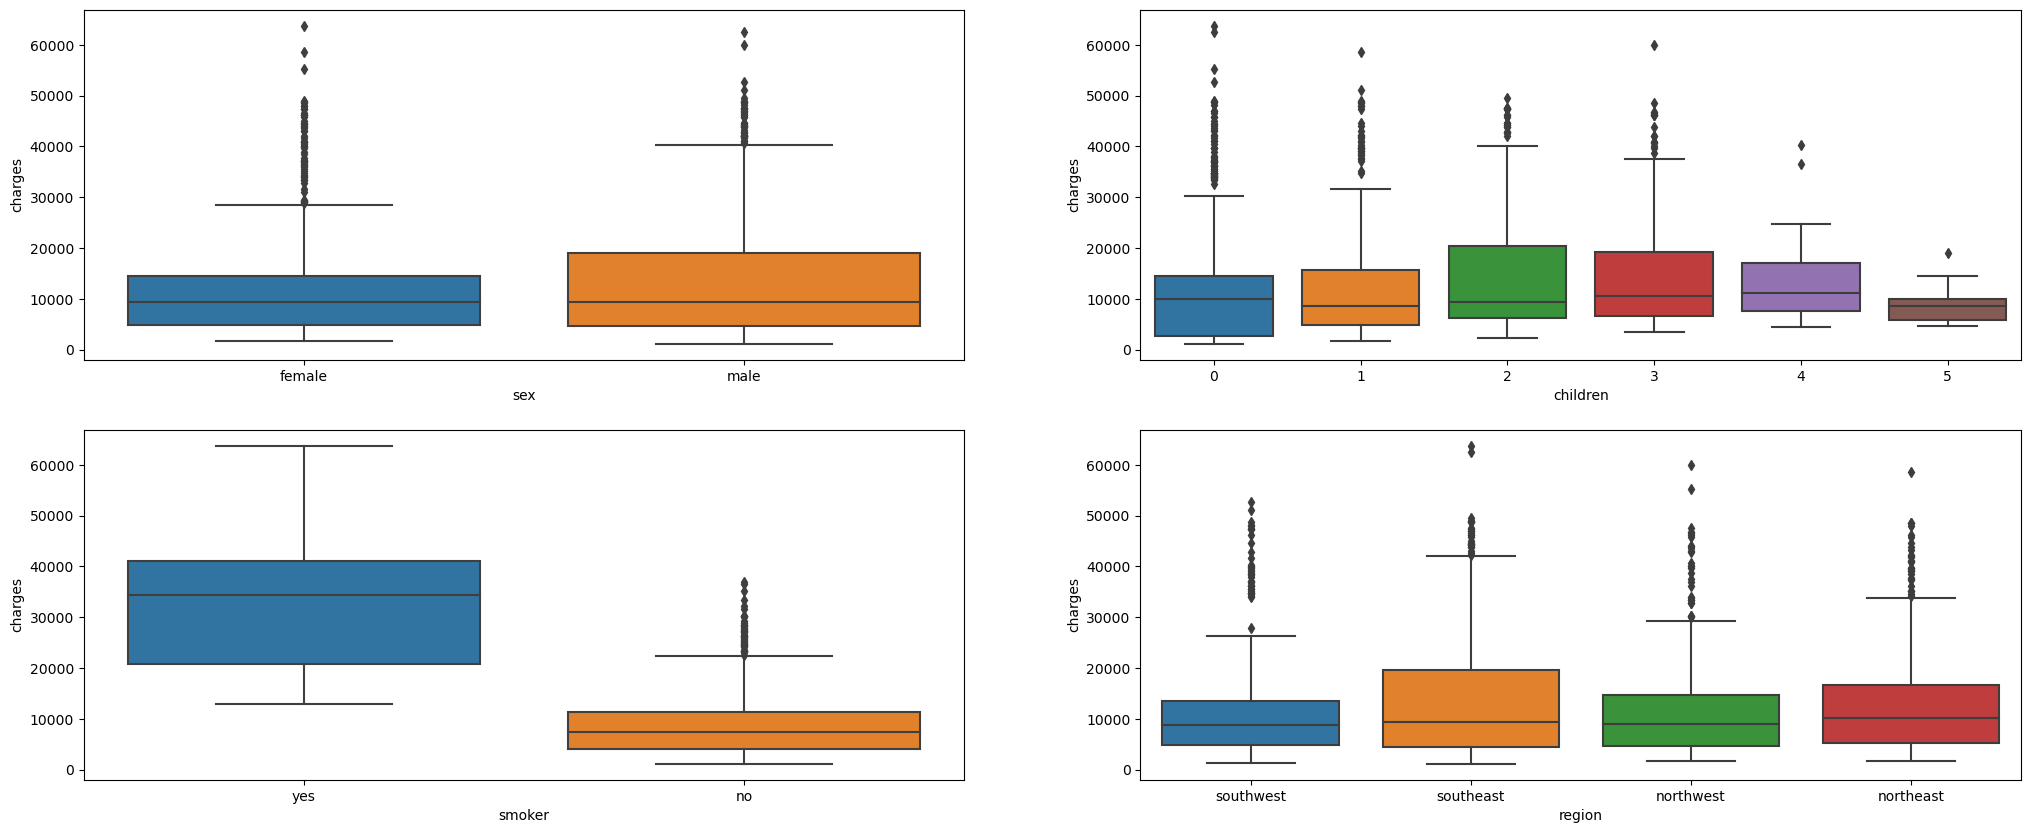

In [39]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'sex', y = 'charges', data = data)
plt.subplot(2,2,2)
sns.boxplot(x = 'children', y = 'charges', data = data)
plt.subplot(2,2,3)
sns.boxplot(x = 'smoker', y = 'charges', data = data)
plt.subplot(2,2,4)
sns.boxplot(x = 'region', y = 'charges', data =data)
plt.show()

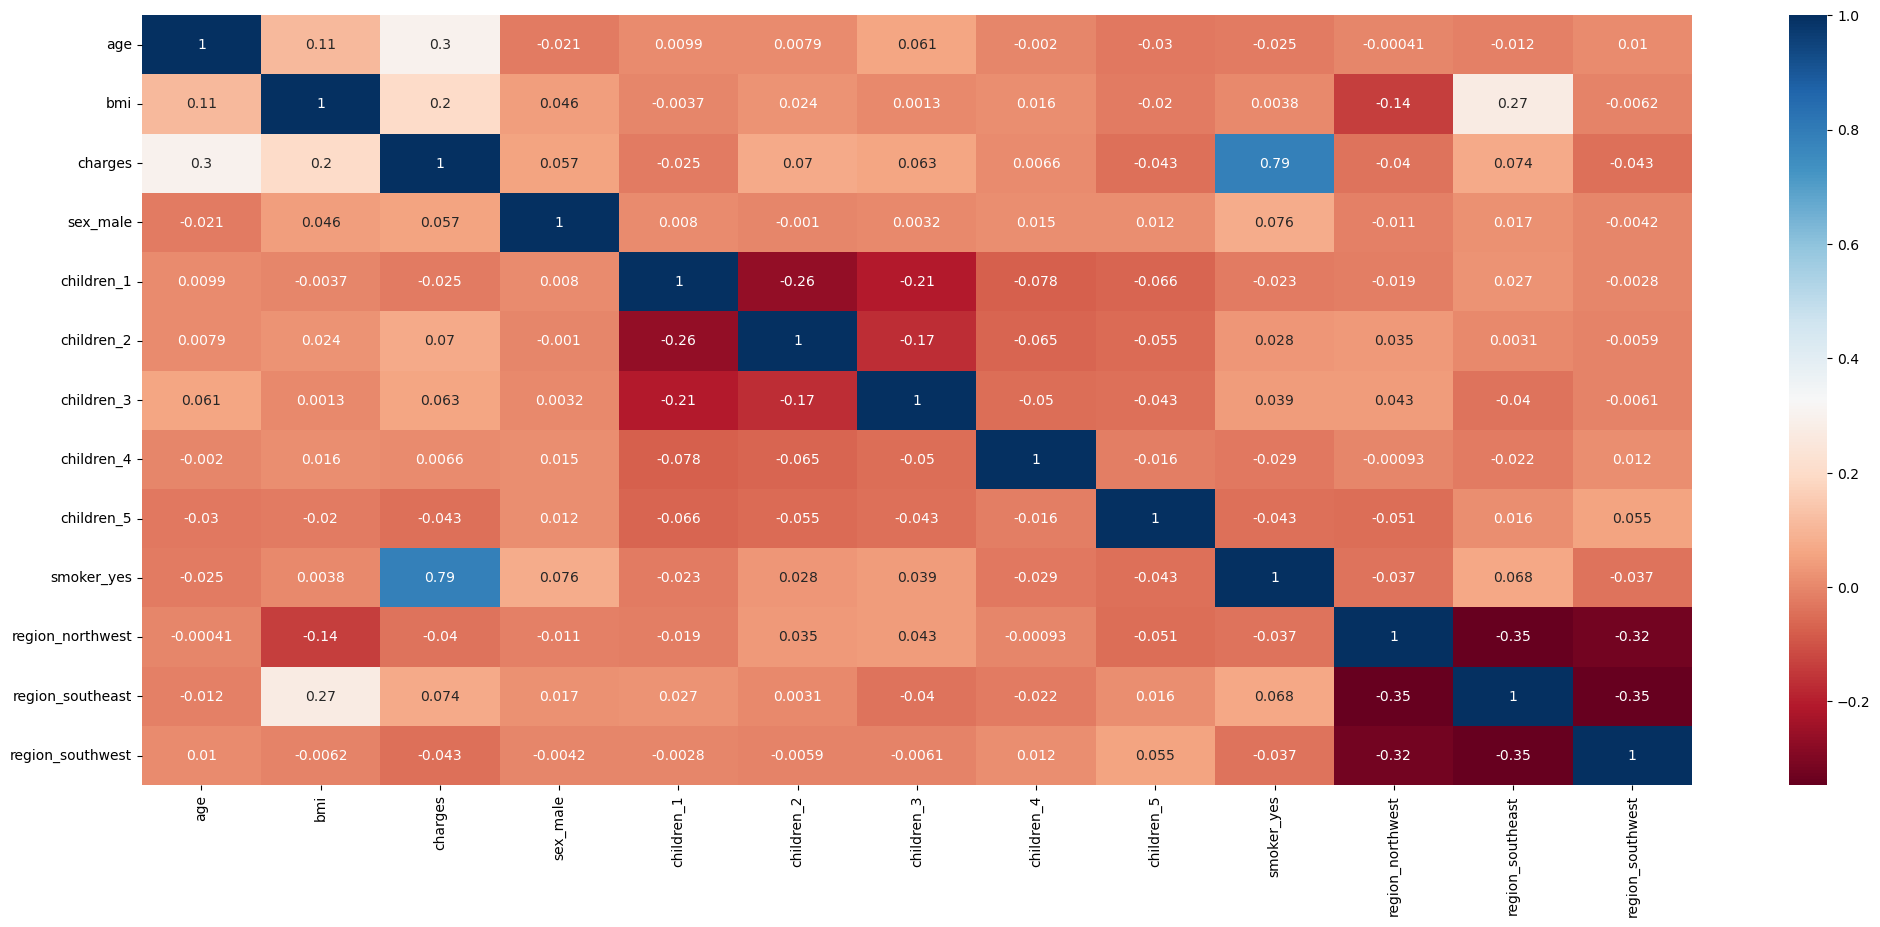

In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: insurance_new) that were chosen for analysis

plt.figure(figsize = (25,10))
sns.heatmap(data_new.corr(), annot = True, cmap="RdBu")
plt.show()

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler= MinMaxScaler()

In [43]:
df_train.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
966,51,24.795,23967.38305,1,0,1,0,0,0,1,1,0,0
522,51,33.915,9866.30485,0,0,0,0,0,0,0,0,0,0
155,44,39.520,6948.70080,1,0,0,0,0,0,0,1,0,0
671,29,31.160,3943.59540,0,0,0,0,0,0,0,0,0,0
1173,38,29.260,6457.84340,1,0,1,0,0,0,0,1,0,0


In [44]:
df_train.columns

Index(['age', 'bmi', 'charges', 'sex_male', 'children_1', 'children_2',
       'children_3', 'children_4', 'children_5', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [45]:
# Apply scaler() to all the numeric variables

num_vars = ['age', 'bmi', 'charges']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [46]:
# Checking values after scaling
df_train.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
966,0.717391,0.237692,0.364661,1,0,1,0,0,0,1,1,0,0
522,0.717391,0.483051,0.139579,0,0,0,0,0,0,0,0,0,0
155,0.565217,0.633844,0.093008,1,0,0,0,0,0,0,1,0,0
671,0.239130,0.408932,0.045040,0,0,0,0,0,0,0,0,0,0
1173,0.434783,0.357815,0.085173,1,0,1,0,0,0,0,1,0,0


In [47]:
df_train.describe()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.458171,0.399088,0.192301,0.497863,0.236111,0.184829,0.117521,0.021368,0.011752,0.194444,0.244658,0.282051,0.242521
std,0.306065,0.167115,0.193690,0.500263,0.424918,0.388366,0.322213,0.144683,0.107826,0.395984,0.430114,0.450239,0.428837
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.277441,0.055033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.456522,0.391176,0.129662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.717391,0.512039,0.245247,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
y_train = df_train.pop('charges')
X_train = df_train

In [49]:
#Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

TypeError: __init__() takes 2 positional arguments but 3 were given